## R

In [2]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(magrittr) # for %>% operator
#install.packages('corrplot')



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘magrittr’


The following object is masked from ‘package:tidyr’:

    extract




### Sampling distribution of a statistic



##### take a simple random sample

In [23]:
loan_inc <- read.csv('/content/loans_income.csv', stringsAsFactors = FALSE)
loan_inc <- loan_inc[1,]

In [24]:

samp_data <- data.frame(income=sample(loan_inc, 500),
                        type='data_dist')



##### take a sample of means of 5 values

In [25]:
samp_mean_05 <- data.frame(
  income = tapply(sample(loan_inc, 500*5),
                  rep(1:500, rep(5, 500)), FUN=mean),
  type = 'mean_of_5')

##### take a sample of means of 20 values

In [26]:
samp_mean_20 <- data.frame(
  income = tapply(sample(loan_inc, 500*20),
                  rep(1:500, rep(20, 500)), FUN=mean),
  type = 'mean_of_20')

##### bind the data.frames and convert type to a factor

In [27]:
income <- rbind(samp_data, samp_mean_05, samp_mean_20)
income$type = factor(income$type,
                     levels=c('data_dist', 'mean_of_5', 'mean_of_20'),
                     labels=c('Data', 'Mean of 5', 'Mean of 20'))

#####  plot the histograms

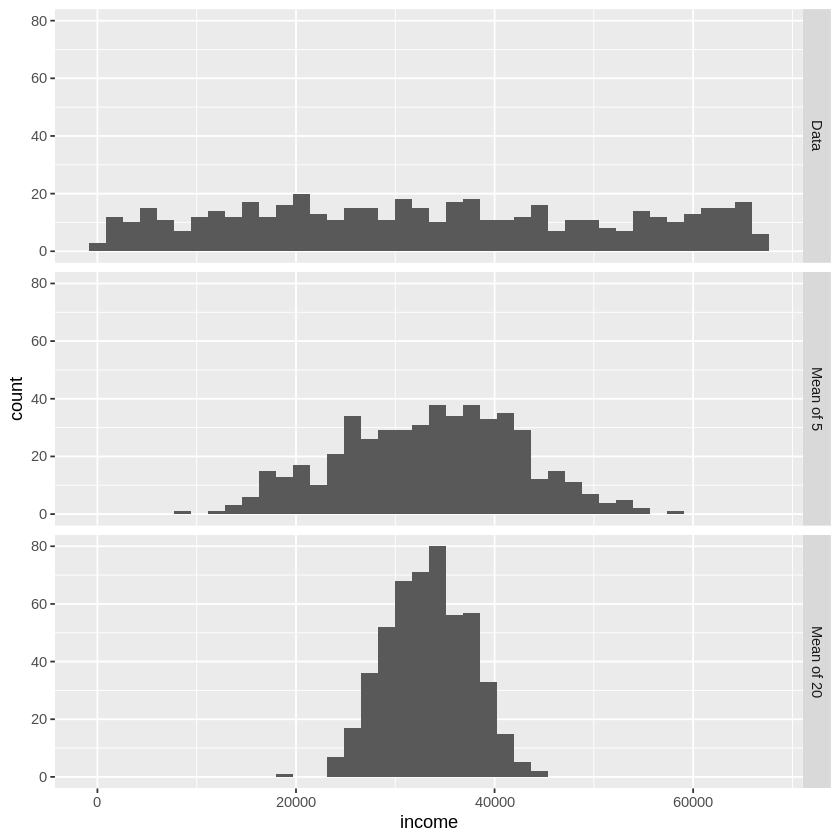

In [28]:
ggplot(income, aes(x=income)) +
  geom_histogram(bins=40) +
  facet_grid(type ~ .)